### IMPORT DATA

In [473]:
import pandas as pd
import numpy
import re

In [474]:
df = pd.read_csv(r"C:\Users\buing\Downloads\fundamentalDS\rawdata.csv")

In [475]:
# Loop through each column and print unique values
def uni_val_column(df, col):
    unique_values = df[col].unique()
    return unique_values

In [476]:
df.dropna(axis=1, how='all', inplace=True)
df.columns
print(df.isna().sum())

Product name                0
Price                       0
Thương hiệu                 1
Bảo hành                    5
CPU                         1
NPU                       549
Chip đồ họa                94
Màn hình                    1
Webcam                     99
Ram                        94
Lưu trữ                    94
Cổng kết nối                1
Âm thanh                  297
Kết nối không dây           3
Bàn phím                   95
Hệ điều hành                3
Kích thước               97
Pin                        96
Khối lượng                 97
Chất liệu                 502
Bảo mật                   424
Đèn LED trên máy          299
Trong hộp có gì           342
Series laptop               4
Tên                         2
Part-number               116
Màu sắc                     2
Nhu cầu                    25
Mô tả bảo hành            552
Dung lượng RAM            575
Dung lượng SSD            575
Cổng HDMI                 608
Công suất pin             587
Kích thước

In [477]:
print(uni_val_column(df, "Công nghệ âm thanh"))

[nan 'Acer TrueHarmony Technology']


## Clean duplicate columns 


In [478]:
#Duplicates from 3 COLUMNS "Kích thước, khối lượng" vs "Kích thước" and "khối lượng"
# Extract 'Kích thước' where it is NaN
mask_size = df['Kích thước'].isna()
df.loc[mask_size, 'Kích thước'] = df.loc[mask_size, 'Kích thước, khối lượng'].str.extract(r'\| (.+?) cm')[0]

# Extract 'Khối lượng' where it is NaN
mask_weight = df['Khối lượng'].isna()
df.loc[mask_weight, 'Khối lượng'] = df.loc[mask_weight, 'Kích thước, khối lượng'].str.extract(r'(\d+\.?\d*)\s*kg')[0]

# Fill NaN in 'Pin' with values from 'Công suât' where 'Pin' is NaN
df['Pin']= df['Pin'].fillna(df['Công suất pin'])

df['Ram']= df['Ram'].fillna(df['Dung lượng RAM'])

df['Lưu trữ']=df['Lưu trữ'].fillna(df['Dung lượng SSD'])

#AM THANH VS CONG NGHE AM THANH
mask_audio = df['Âm thanh'].isna()
df.loc[mask_audio, 'Âm thanh'] = df.loc[mask_audio, 'Công nghệ âm thanh']

# duplicate value of CPU information 
# xu li doan intel ai: Intel® Core™ Ultra 5-125H ( 3.6 GHz - 4.5 GHz / 18MB / 14 nhân, 18 luồng ), Intel AI
mask_cpu = df['CPU'].notna()
df.loc[mask_cpu, 'CPU'] = df.loc[mask_cpu, 'CPU'].str.split(',').str[0]

In [479]:
#CHECK REFILL CORRECTLY
filtered_rows = df[df['Dung lượng RAM'].notna()]
# Display the filtered rows
filtered_rows[['Ram', 'Dung lượng RAM', 'Pin', 'Công suất pin', 'Lưu trữ', 'Dung lượng SSD']]

,Ram,Dung lượng RAM,Pin,Công suất pin,Lưu trữ,Dung lượng SSD
80,8GB,8GB,70 Wh,70 Wh,512GB SSD,512GB SSD
81,16GB,16GB,70 Wh,70 Wh,1TB SSD,1TB SSD
82,16GB,16GB,70 Wh,70 Wh,512GB SSD,512GB SSD
281,16GB,16GB,35 Wh,35 Wh,512GB SSD,512GB SSD
282,16GB,16GB,NaN,NaN,1TB SSD,1TB SSD
...,...,...,...,...,...,...
663,32GB,32GB,70 Wh,70 Wh,512GB SSD,512GB SSD
664,64GB,64GB,70 Wh,70 Wh,1TB SSD,1TB SSD
665,32GB,32GB,70 Wh,70 Wh,2TB SSD,2TB SSD
666,32GB,32GB,70 Wh,70 Wh,1TB SSD,1TB SSD


In [480]:
#drop redundant columns
df =df.drop(columns=['Kích thước, khối lượng', 'Công suất pin', 'Dung lượng RAM', 'Dung lượng SSD', 'Tên'])

In [481]:
print(df.isna().sum())

Product name               0
Price                      0
Thương hiệu                1
Bảo hành                   5
CPU                        1
NPU                      549
Chip đồ họa               94
Màn hình                   1
Webcam                    99
Ram                        1
Lưu trữ                    1
Cổng kết nối               1
Âm thanh                 296
Kết nối không dây          3
Bàn phím                  95
Hệ điều hành               3
Kích thước               5
Pin                       15
Khối lượng                 4
Chất liệu                502
Bảo mật                  424
Đèn LED trên máy         299
Trong hộp có gì          342
Series laptop              4
Part-number              116
Màu sắc                    2
Nhu cầu                   25
Mô tả bảo hành           552
Cổng HDMI                608
Công nghệ âm thanh       667
Đèn laptop              667
Phụ kiện đi kèm          667
Tính năng đặc biệt    665
dtype: int64


### drop columns that have to mmany missing values (>90% missing)

In [482]:
# # Merge the specified columns into a new column
#df['Miêu tả'] = df[['Công nghệ âm thanh', 'Đèn laptop', 'Phụ kiện đi kèm', 'Tính năng đặc biệt', 'Mô tả bảo hành']].agg(lambda x: ' | '.join(x.dropna().astype(str)), axis=1)
#df = df.drop(columns = ['Công nghệ âm thanh', 'Đèn laptop', 'Phụ kiện đi kèm', 'Tính năng đặc biệt', 'Mô tả bảo hành'])

# Store original columns
original_columns = set(df.columns)

# Define threshold and drop columns where NaN values exceed it
threshold = 0.1 * len(df)  # 90% of the total number of rows
df = df.dropna(axis=1, thresh=threshold)

# Find dropped columns by comparing original columns to current columns
dropped_columns = original_columns - set(df.columns)

print("Dropped columns:", dropped_columns)

#print(df.isna().sum())

Dropped columns: {'Công nghệ âm thanh', 'Cổng HDMI', 'Tính năng đặc biệt', 'Đèn laptop', 'Phụ kiện đi kèm'}


### Standardize column names(to avoid syntax eror name in database)

In [483]:

df.rename(columns={
    'Thương hiệu': 'Brand',
    'CPU': 'CPU',
    'NPU': 'NPU',
    'Chip đồ họa': 'GPU',
    'Màn hình': 'Display',
    'Lưu trữ': 'Storage',
    'Cổng kết nối': 'Ports',
    'Âm thanh': 'Audio',
    'Kết nối không dây': 'Wireless connection',
    'Bàn phím': 'Keyboard',
    'Hệ điều hành': 'OS',
    'Kích thước': 'Size',
    'Pin': 'Battery',
    'Khối lượng': 'Weight',
    'Chất liệu': 'Material',
    'Bảo mật': 'Security',
    'Đèn LED trên máy': 'LED',
    'Trong hộp có gì': 'box',
    'Màu sắc': 'Color',
    'Nhu cầu': 'Usage category',
    'Bảo hành': 'Warranty'
}, inplace=True)


In [484]:
# Function to categorize the "Nhu cầu" values
def categorize_usage(value):
    # Check if value is a string
    if isinstance(value, str):
        if 'Gaming' in value:
            return 'Gaming'
        elif 'Đồ họa - Kỹ thuật' in value:
            return 'Đồ họa - Kỹ thuật'
        elif any(term in value for term in ['Văn phòng', 'Doanh nghiệp', 'Học sinh - Sinh viên', 'Doanh nhân']):
            return 'basic'
    return value  # Return the original value if none of the conditions match or if it's not a string

# Apply the function to the "Nhu cầu" column
df['Usage category'] = df['Usage category'].apply(categorize_usage)

# Preprocessing and Feature engineering



### Inspect and analyse

In [485]:
# Get the number of unique values per column
unique_counts = {col: df[col].nunique() for col in df.columns}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns=['Column', 'Unique Values Count'])
print(unique_counts_df)

                 Column  Unique Values Count
0          Product name                  638
1                 Price                  308
2                 Brand                    9
3              Warranty                    3
4                   CPU                  149
5                   NPU                   14
6                   GPU                  151
7               Display                  331
8                Webcam                    4
9                   Ram                  222
10              Storage                   29
11                Ports                  172
12                Audio                   17
13  Wireless connection                   24
14             Keyboard                   39
15                   OS                   16
16                 Size                  274
17              Battery                   92
18               Weight                   38
19             Material                   10
20             Security                   20
21        

In [486]:
df['Webcam'] = df['Webcam'].str.extract(r'([A-Za-z]+)(?=\s*webcam)', expand=False)

df['Price'] = df['Price'].str.replace('.', '', regex=False)   # Remove dots
df['Price'] = df['Price'].str.replace('₫', '', regex=False)   # Remove currency symbol
df['Price'] = df['Price'].astype(float)  # Convert to float

df['Battery'] = df['Battery'].str.extract(r'(\d+)(?= Wh)')
df['Battery'] = df['Battery'].astype(float)

In [487]:
def clean_product_name(row):
    if isinstance(row, str):
        # Remove any content within parentheses including the parentheses themselves
        row = re.sub(r'\(.*?\)', '', row)
        # Strip any extra whitespace left after removal
        row = row.strip()
    return row

df['Product name']=df['Product name'].apply(clean_product_name)

In [488]:
uni_val_column(df, 'Product name')

array(['Laptop ACER Swift Go 14 AI SFG14-73-53X7',
       'Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y',
       'Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN',
       'Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83DF0046VN',
       'Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004YVN',
       'Laptop AI Lenovo Yoga Book 9 13IMU9 - 83FF001SVN',
       'Máy tính xách tay/ Laptop Lenovo IdeaPad Slim 5 14IMH9 - 83DA001NVN',
       'Laptop Lenovo Yoga 9 2in1-14IMH9 - 83AC000SVN',
       'Laptop Yoga Slim 7 14IMH9 - 83CV001VVN',
       'Laptop Lenovo Yoga Slim 7 14IMH9 - 83CV001UVN',
       'Laptop MSI Modern 14 C13M - 609VN',
       'Laptop MSI Modern 14 C13M - 611VN',
       'Laptop Lenovo Yoga Slim 6 14IRH8 - 83E00008VN',
       'Laptop AI Lenovo Ideapad Slim 5 16IMH9 - 83DC001SVN',
       'Laptop AI Lenovo Ideapad Slim 5 16IMH9 - 83DC001RVN',
       'Laptop AI Lenovo IdeaPad Slim 5 14IMH9 - 83DA006TVN',
       'Laptop ASUS Gaming Vivobook K3605ZU-RP296W',
       'Laptop ASUS Vivobook Go 14 

### Screen and display

In [489]:
print(uni_val_column(df, 'Display'))

['14" ( 2880 x 1800 ) 2.8K IPS , 120Hz , không cảm ứng , 400 nits , 100% sRGB , Acer ComfyView'
 '16" ( 1920 x 1200 ) WUXGA 16:10 , IPS , 165Hz , không cảm ứng , 300 nits , 100% sRGB , Acer ComfyView'
 '15.6" ( 1920 x 1080 ) Full HD IPS , 144Hz , không cảm ứng , 300 nits , 100% sRGB , Màn hình chống lóa , G-Sync'
 '16" ( 2560 x 1600 ) WQXGA IPS , 240Hz , 500 nits , 100% DCI-P3 , G-Sync'
 '16" ( 2560 x 1600 ) WQXGA IPS , 165Hz , 350 nits , 100% sRGB , G-Sync'
 '13.3" ( 2880 x 1800 ) 2.8K IPS , cảm ứng , 400 nits , 100% DCI-P3'
 '14" ( 1920 x 1200 ) WUXGA OLED , không cảm ứng , 400 nits , 100% DCI-P3 , Màn hình gương'
 '14" ( 2880 x 1800 ) OLED , 120Hz , cảm ứng , 400 nits , 100% DCI-P3'
 '14" ( 1920 x 1200 ) WUXGA OLED , 400 nits , 100% DCI-P3 , Màn hình gương'
 '14" ( 1920 x 1080 ) Full HD IPS , không cảm ứng'
 '14" ( 1920 x 1200 ) WUXGA OLED , 400 nits , 100% DCI-P3'
 '16" ( 2048 x 1280 ) 2K OLED , 120Hz , không cảm ứng , 400 nits , 100% DCI-P3 , Màn hình gương'
 '14" 

In [490]:
def extract_screen_size(row):
    if isinstance(row, str):  # Ensure the row is a string
        # Search for a pattern like 'X.Y"' where X.Y is the size in inches
        match = re.search(r'(\d+(\.\d+)?)"', row)
        if match:
            return float(match.group(1))  # Return the screen size as a float
    return None

def extract_refresh_rate(row):
    if isinstance(row, str):  # Ensure the row is a string
        # Search for a pattern like 'X"' where X is the size in inches
        match = re.search(r'(\d+)(?=Hz)', row)
        if match:
            return int(match.group(1))  # Return the screen size as an integer
    return None 

def extract_resolution(row):
    """Extract resolution from a given screen specification string."""
    if isinstance(row, str):  # Ensure the row is a string
        resolution_match = re.search(r'(\d+)\s+x\s+(\d+)', row)
        if resolution_match:
            return f"{resolution_match.group(1)} x {resolution_match.group(2)}"
    return None

def extract_brightness(row):
    """Extract brightness in nits from a given screen specification string."""
    if isinstance(row, str):  # Ensure the row is a string
        brightness_match = re.search(r'(\d+)\s*nits', row)
        if brightness_match:
            return int(brightness_match.group(1))
    return None
df['Screen size']=df['Display'].apply(extract_screen_size)
df['Refresh rate']=df['Display'].apply(extract_refresh_rate)
df['Display Resolution']=df['Display'].apply(extract_resolution)
df['Screen Brightness ']=df['Display'].apply(extract_brightness)


### storage

In [491]:
def extract_storage_size(row):
    if isinstance(row, str): 
        # Check for a multiplier like "2 x" only if it's before "GB"
        coeff_match = re.search(r'(\d+)\s*x.*?(\d+)\s*GB', row)
        if coeff_match:
            coeff = int(coeff_match.group(1))  # Get the coefficient from "2 x"
        else:
            coeff = 1  # Default coefficient if not found
        
        # Extract GB directly
        if 'GB' in row:  
            match = re.search(r'(\d+)(?=\s*GB)', row)  # Look for GB
            if match:
                return int(match.group(1)) * coeff  # Return the total size in GB
        elif 'TB' in row:  # Extract TB and convert to GB
            match = re.search(r'(\d+)(?=\s*TB)', row)
            if match:
                return int(match.group(1)) * 1024 * coeff
    return None

df['Storage'] = df['Storage'].apply(extract_storage_size)



### RAM and CPU

In [492]:
#######
def extract_ram_info(row):
    if isinstance(row, str):  # Ensure the row is a string
        # Check for a multiplier like "2 x"
        slot_match = re.search(r'(\d+)\s*x.*?(\d+)\s*GB', row)
        slot_num = int(slot_match.group(1)) if slot_match else 1  # Default to 1 if no multiplier
        
        # Extract the RAM size
        ram_match = re.search(r'(\d+)\s*GB', row)
        ram_size = int(ram_match.group(1)) * slot_num if ram_match else None
        
        # Extract the RAM type (e.g., "DDR5")
        ram_type_match = re.search(r'(DDR|LPDDR)\d*', row)
        ram_type = ram_type_match.group(0) if ram_type_match else None

        
        # Extract the RAM frequency (e.g., "5600 MHz")
        frequency_match = re.search(r'(\d+\s*MHz)', row)
        ram_frequency = frequency_match.group(1) if frequency_match else None
        
        # Combine all extracted information into a dictionary
        return {
            'RAM size': ram_size,
            'RAM frequency': ram_frequency,
            'RAM slots': slot_num,
            'RAM type': ram_type
        }

    return None

In [493]:
# Apply the function and expand the result into separate columns
df_ram_info = df['Ram'].apply(extract_ram_info).apply(pd.Series)

# Combine with original DataFrame if needed
df = pd.concat([df, df_ram_info], axis=1)

df[['Ram', 'RAM size', 'RAM frequency','RAM slots','RAM type']].head()

,Ram,RAM size,RAM frequency,RAM slots,RAM type
0,1 x 16GB LPDDR5x 6400MHz Không nâng cấp được ),16.0,6400MHz,1.0,LPDDR5
1,2 x 8GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối ...,16.0,5600MHz,2.0,DDR5
2,2 x 12GB DDR5 4800MHz ( 2 Khe cắm / Hỗ trợ tối...,24.0,4800MHz,2.0,DDR5
3,2 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,32.0,5600MHz,2.0,DDR5
4,1 x 16GB DDR5 5600MHz ( 2 Khe cắm / Hỗ trợ tối...,16.0,5600MHz,1.0,DDR5


In [494]:
no_core = [] #list of laptop have no core info
def extract_cpu_info(row):
    if isinstance(row, str):  # Ensure the row is a string
        # Get CPU model name
        if '-' in row:
            row = row.replace('-', '')
        # if '\u00ae' in row: #'®' 
        #     row = row.replace('\u00ae', '')
        # if '\u2122' in row:
        #     row = row.replace('\u2122', '')
            
        name_match = re.match(r'^(.*?)(?=\s*\()', row)
        cpu_model = name_match.group(1).strip() if name_match else None
        
        # Get the frequency string
        freq_match = re.search(r'\(\s*(\d+(?:\.\d+)?\s*GHz(?:\s*-\s*\d+(?:\.\d+)?\s*GHz)?)', row)
        frequency = freq_match.group(1).strip() if freq_match else None
        
        # Get the cache size
        cache_match = re.search(r'/\s*(\d+MB)\s*/', row)
        cache_size = cache_match.group(1).strip() if cache_match else None
        
        # Get the core num 
        cores = None 
        if '-Core CPU' in row: #for Apple M3 Max ( 16-Core CPU / 40-Core GPU )
            cores_match = re.search(r'\s*(\d+)\s*-Core CPU', row)
            cores = cores_match.group(1).strip() if cores_match else None 
        elif '‑Core CPU' in row: #for Apple M3 Max ( 16-Core CPU / 40-Core GPU )
            cores_match = re.search(r'\s*(\d+)\s*‑Core CPU', row)
            cores = cores_match.group(1).strip() if cores_match else None                  
        elif 'nhân' in row: 
            cores_match = re.search(r'\s*(\d+)\s*nhân', row)
            cores = cores_match.group(1).strip() if cores_match else None
        if cores is None:
            no_core.append(row) 
             
        return {
            'CPU Model': cpu_model,
            'CPU Frequency': frequency,
            'CPU Cache Size': cache_size,
            'CPU Cores': int(cores) if cores is not None else None  # Convert cores to an integer
        }

    return None
# Apply the function to the 'CPU' column and expand the results into new columns
cpu_info_df = df['CPU'].apply(extract_cpu_info).apply(pd.Series)

# Join the new columns to the original DataFrame
df = df.join(cpu_info_df)

print(df[['CPU', 'CPU Model', 'CPU Frequency', 'CPU Cache Size', 'CPU Cores']].iloc[640:650])
#df = df.concat([df, cpu_info_df], axis=1)
#print(no_core)

                                       CPU CPU Model CPU Frequency  \
640  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
641  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
642  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
643  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
644  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
645  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
646  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
647   Apple M2 ( 8-Core CPU / 8-Core GPU )  Apple M2          None   
648  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   
649  Apple M2 ( 8-Core CPU / 10-Core GPU )  Apple M2          None   

    CPU Cache Size  CPU Cores  
640           None        NaN  
641           None        NaN  
642           None        NaN  
643           None        NaN  
644           None        NaN  
645           None        NaN  
646  

In [495]:
df.isnull().sum()

Product name             0
Price                    0
Brand                    1
Warranty                 5
CPU                      1
NPU                    549
GPU                     94
Display                  1
Webcam                 100
Ram                      1
Storage                  1
Ports                    1
Audio                  296
Wireless connection      3
Keyboard                95
OS                       3
Size                     5
Battery                 51
Weight                   4
Material               502
Security               424
LED                    299
box                    342
Series laptop            4
Part-number            116
Color                    2
Usage category          25
Mô tả bảo hành         552
Screen size              1
Refresh rate           402
Display Resolution       1
Screen Brightness      295
RAM size                 1
RAM frequency          150
RAM slots                1
RAM type                95
CPU Model                2
C

In [496]:
df = df.drop_duplicates(subset=['Product name'])
use_cols = [ 'Product name', 'Price', 'Brand', 'CPU Model', 'RAM size', 'Storage', 'Screen size', 'Battery', 
            'CPU Cache Size',  'CPU Cores', 'CPU Frequency',
             'NPU', 'GPU', 'RAM frequency', 'RAM slots', 'RAM type',   
            'Audio', 'Webcam', 'OS', 'Ports', 'Size', 'Weight', 'Material', 'Color',
            'Wireless connection', 'Keyboard' , 'LED', 'Security', 'box', 'Series laptop', 'Part-number', 'Warranty',
            'Refresh rate', 'Display Resolution', 'Screen Brightness ','Usage category',
            ]
df.loc[:, use_cols].iloc[5:15]


,Product name,Price,Brand,CPU Model,RAM size,Storage,Screen size,Battery,CPU Cache Size,CPU Cores,...,LED,Security,box,Series laptop,Part-number,Warranty,Refresh rate,Display Resolution,Screen Brightness,Usage category
6,Laptop AI Lenovo Yoga Book 9 13IMU9 - 83FF001SVN,61490000.0,Lenovo,Intel® Core™ Ultra 7155U,32.0,1024.0,13.3,80.0,12MB,12.0,...,NaN,Khuôn mặt,Lenovo Digital Pen 3,Yoga,83FF001SVN,24 tháng,NaN,2880 x 1800,400.0,Gaming
7,Máy tính xách tay/ Laptop Lenovo IdeaPad Slim ...,21490000.0,Lenovo,Intel® Core™ Ultra 5125H,16.0,512.0,14.0,57.0,18MB,14.0,...,không đèn,Khuôn mặt,NaN,Ideapad,83DA001NVN,24 tháng,NaN,1920 x 1200,400.0,basic
8,Laptop Lenovo Yoga 9 2in1-14IMH9 - 83AC000SVN,43990000.0,Lenovo,Intel® Core™ Ultra 7155H,16.0,1024.0,14.0,75.0,24MB,16.0,...,NaN,Khuôn mặt,NaN,Yoga,83AC000SVN,24 tháng,120.0,2880 x 1800,400.0,basic
9,Laptop Yoga Slim 7 14IMH9 - 83CV001VVN,30990000.0,Lenovo,Intel® Core™ Ultra 7155H,32.0,1024.0,14.0,65.0,24MB,16.0,...,NaN,Khuôn mặt,NaN,Yoga,83CV001VVN,24 tháng,NaN,1920 x 1200,400.0,basic
10,Laptop Lenovo Yoga Slim 7 14IMH9 - 83CV001UVN,30490000.0,Lenovo,Intel® Core™ Ultra 7155H,32.0,512.0,14.0,65.0,24MB,16.0,...,NaN,Khuôn mặt,NaN,Yoga,83CV001UVN,24 tháng,NaN,1920 x 1200,400.0,basic
11,Laptop MSI Modern 14 C13M - 609VN,12990000.0,MSI,Intel® Core™ i51335U,8.0,512.0,14.0,39.0,12MB,10.0,...,không đèn,NaN,NaN,Modern Series,609VN,24 tháng,NaN,1920 x 1080,NaN,basic
12,Laptop MSI Modern 14 C13M - 611VN,13990000.0,MSI,Intel® Core™ i51335U,16.0,512.0,14.0,39.0,12MB,10.0,...,không đèn,NaN,NaN,Modern Series,611VN,24 tháng,NaN,1920 x 1080,NaN,Gaming
13,Laptop Lenovo Yoga Slim 6 14IRH8 - 83E00008VN,24990000.0,Lenovo,Intel® Core™ i713700H,16.0,512.0,14.0,57.0,24MB,14.0,...,không đèn,NaN,Adapter,Yoga,83E00008VN,36 tháng,NaN,1920 x 1200,400.0,basic
14,Laptop AI Lenovo Ideapad Slim 5 16IMH9 - 83DC0...,25490000.0,Lenovo,Intel® Core™ Ultra 7155H,32.0,512.0,16.0,57.0,24MB,16.0,...,NaN,Khuôn mặt,NaN,Ideapad,83DC001SVN,24 tháng,120.0,2048 x 1280,400.0,basic
15,Laptop AI Lenovo Ideapad Slim 5 16IMH9 - 83DC0...,21990000.0,Lenovo,Intel® Core™ Ultra 5125H,16.0,512.0,16.0,57.0,18MB,14.0,...,NaN,Khuôn mặt,NaN,Ideapad,83DC001RVN,24 tháng,120.0,2048 x 1280,400.0,basic


In [497]:
import re
cols = ['NPU', 'GPU', 'CPU Model', 'Product name']
# Define a pattern to match any non-ASCII character
def find_special_characters(df, column_name):
    special_characters = set()
    
    # Go through each row and find non-ASCII characters
    for row in df[column_name]:
        if isinstance(row, str):
            # Find characters that are not standard ASCII
            matches = re.findall(r'[^\x00-\x7F]', row)
            special_characters.update(matches)
    
    return special_characters

# Example usage
all_special_characters = []
for i in cols:
    chars = find_special_characters(df, i)
    for j in chars:
        all_special_characters.append(j)
                              

# Combine all unique special characters from the columns

print("Unique special characters found:", all_special_characters)


Unique special characters found: ['®', '™', 'đ', 'ê', 'ế', '®', '™', '®', '™', 'í', 'á']


In [498]:
def remove_special_characters(row, special_characters):
    if isinstance(row, str):
        for char in special_characters:
            row = row.replace(char, '')
    return row

# Apply the removal function to each column
df['NPU'] = df['NPU'].apply(lambda x: remove_special_characters(x, all_special_characters))
df['GPU'] = df['GPU'].apply(lambda x: remove_special_characters(x, all_special_characters))
df['CPU Model'] = df['CPU Model'].apply(lambda x: remove_special_characters(x, all_special_characters))


In [499]:
import re
import pandas as pd

def remove_unicode_sequences(row):
    if isinstance(row, str):  # Ensure the row is a string
        # Define the regex pattern to match any Unicode sequence in the form \uXXXX
        unicode_pattern = r'\\u[0-9a-fA-F]{4}'
        # Substitute all matches with an empty string
        row = re.sub(unicode_pattern, '', row)
    return row

# Apply the function to each relevant column
for col in cols:
    df[col] = df[col].apply(remove_unicode_sequences)



In [500]:
df[cols]

,NPU,GPU,CPU Model,Product name
0,Intel AI Boost NPU,Onboard Intel Arc Graphics,Intel Core Ultra 5125H,Laptop ACER Swift Go 14 AI SFG14-73-53X7
1,AMD XDNA 16 TOPS,GeForce RTX 4050 6GB GDDR6 AMD Radeon 780M,AMD Ryzen 7 8845HS,Laptop ACER Nitro V 16 ProPanel ANV16-41-R36Y
2,NaN,GeForce RTX 4060 8GB GDDR6 Intel UHD Graphics ...,Intel Core i713650HX,Laptop Lenovo Legion 5 15IRX9 - 83JJ000FVN
3,NaN,GeForce RTX 4070 8GB GDDR6 Intel UHD Graphics ...,Intel Core i914900HX,Laptop gaming Lenovo Legion Pro 5 16IRX9 - 83D...
4,NaN,GeForce RTX 4060 8GB GDDR6 Intel UHD Graphics ...,Intel Core i714650HX,Laptop gaming Lenovo Legion 5 16IRX9 - 83DG004YVN
...,...,...,...,...
634,NaN,GeForce RTX 3060 6GB GDDR6 AMD Radeon Graphics...,AMD Ryzen 5 5600H,Laptop Gigabyte A5 K1-AVN1030SB
635,NaN,Onboard Intel Iris Xe Graphics,Intel Core i51230U,Laptop HP Envy X360 13-bf0112TU - 7C0N9PA
636,NaN,NaN,Apple M3,"Máy tính xách tay Macbook Air 13.6"""
637,NaN,NaN,Apple M3,"Apple MacBook Air M3 13.6"""


In [501]:
integrated_card = ['Intel Iris Xe Graphics', 'AMD Radeon Graphics', 'Intel Arc Graphics','Intel UHD Graphics']
def clean_gpu(row):
    if isinstance(row, str):  
        if 'Onboard' in row:
            row = row.replace('Onboard','')
        elif 'GeForce' or 'RTX' or 'GTX' in row:
            if 'GeForce' in row:
                row = row.replace('GeForce', 'NVIDIA GeForce')
            for i in integrated_card:
                if i in row: 
                    row = row.replace(i,'')
                    continue
            if 'RTX' in row:
                match = re.search(r'RTX\s*(\S+)', row)
                if match:
                    model = match.group(1) # Capture the model part after 'GeForce RTX'
                    row = f'NVIDIA GeForce RTX {model}'
            if 'GTX' in row:
                match = re.search(r'GTX\s*(\S+)', row)
                if match:
                    model = match.group(1) # Capture the model part after 'GeForce RTX'
                    row = f'NVIDIA GeForce GTX {model}'   

        row = row.strip()
    return row 

df['GPU']=df['GPU'].apply(clean_gpu)


In [502]:
# Convert DataFrame to JSON
df.loc[:, use_cols].to_json('clean_laptop.json', orient='records', lines=True)

# EDA

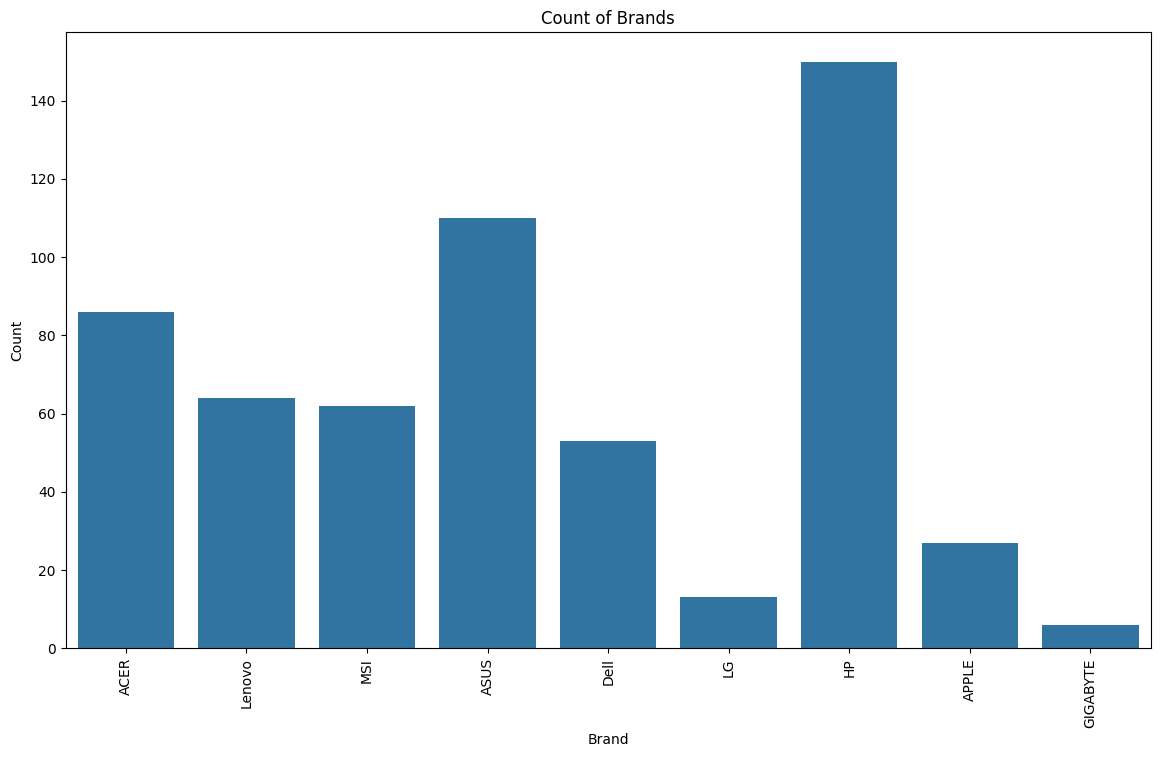

In [503]:
# laptop brand count
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(14, 8))
sns.countplot(x='Brand', data=df)
plt.title('Count of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

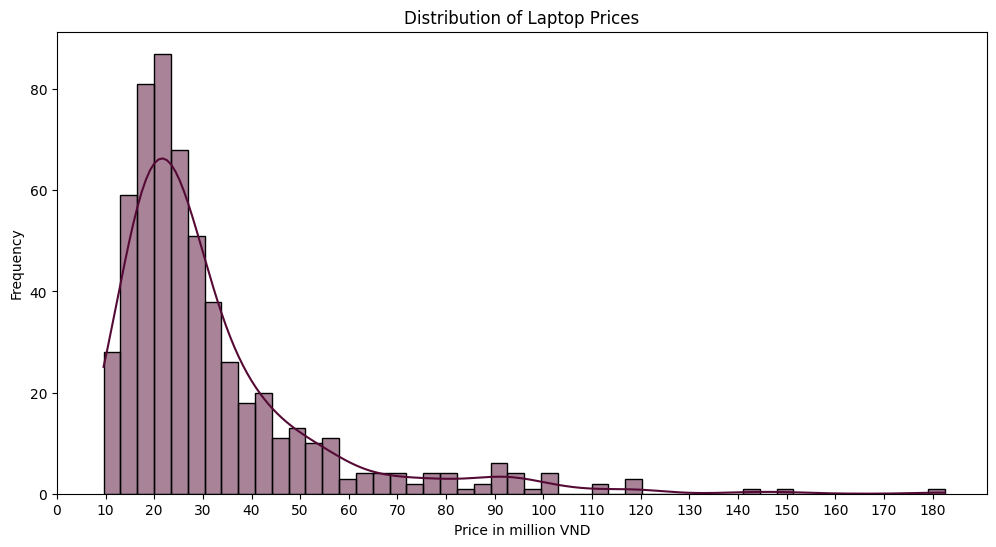

In [504]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price']/1000000, bins=50, kde=True, color='#550A35') 
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price in million VND')
plt.ylabel('Frequency')
max_price = (df['Price'] / 1000000).max()
plt.xticks(np.arange(0, max_price + 1, step=10)) 
plt.show()

In [505]:
for i in uni_val_column(df, 'GPU'):
    print(i)

Intel Arc Graphics
NVIDIA GeForce RTX 4050
NVIDIA GeForce RTX 4060
NVIDIA GeForce RTX 4070
Intel Iris Xe Graphics
AMD Radeon 610M
Intel UHD Graphics
AMD Radeon Graphics
NVIDIA GeForce RTX 3050
AMD Radeon 890M
AMD Radeon 780M
NVIDIA GeForce RTX 4080
AMD Radeon 760M
nan
NVIDIA GeForce RTX 2050
NVIDIA GeForce RTX 3050Ti
NVIDIA GeForce MX570A 2GB GDDR6
NVIDIA GeForce MX550 2GB GDDR6
NVIDIA GeForce RTX 4090
AMD Radeon 610
NVIDIA GeForce RTX 3060
AMD Radeon 680M
Qualcomm Adreno GPU
Intel UHD Graphics 770
NVIDIA GeForce RTX 2000
NVIDIA GeForce RTX A500
NVIDIA GeForce RTX 3070Ti
NVIDIA GeForce RTX 3070
NVIDIA GeForce GTX 1650
AMD Radeon Vega 8 Graphics

AMD Radeon 880M
AMD Radeon Vega 7 Graphics
NVIDIA GeForce MX570 2GB GDDR6
AMD Radeon 660M
Intel Arc A530M 4GB GDDR6
NVIDIA GeForce RTX A1000
